In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from rdkit.Chem import MolFromMolBlock, Descriptors, Descriptors3D
import feather

In [2]:
train = pd.read_csv("../data/input/train.csv")
test = pd.read_csv("../data/input/test.csv")
structures = pd.read_csv("../data/input/structures.csv")
scalar = pd.read_csv("../data/input/scalar_coupling_contributions.csv")
spsbm = pd.read_csv("../data/input/sample_submission.csv")
potential = pd.read_csv("../data/input/potential_energy.csv")
mulliken = pd.read_csv("../data/input/mulliken_charges.csv")
magnetic = pd.read_csv("../data/input/magnetic_shielding_tensors.csv")
dipole_moments = pd.read_csv("../data/input/dipole_moments.csv")

KeyboardInterrupt: 

In [ ]:
train.head()

In [ ]:
train.shape

In [ ]:
train['molecule_name'].nunique()

In [ ]:
train['type'].value_counts()

In [ ]:
sns.violinplot(x='type', y='scalar_coupling_constant', data=train)

In [ ]:
test.head()

In [ ]:
test.shape

In [ ]:
test['molecule_name'].nunique()

In [ ]:
test['type'].value_counts()

In [ ]:
structures.head()

### Data below are provided only for train set. 

In [ ]:
scalar.head()

In [14]:
#fc, sd, pso, dso足し合わせたものが本コンペの目的変数

In [15]:
potential.head()

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


In [16]:
#分子のポテンシャルエネルギー

In [17]:
mulliken.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [18]:
#マリケン電荷

In [19]:
magnetic.head()

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


In [20]:
#磁気遮蔽テンソル？

In [21]:
dipole_moments.head()

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


In [22]:
#双極子モーメント（三次元ベクトル）

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


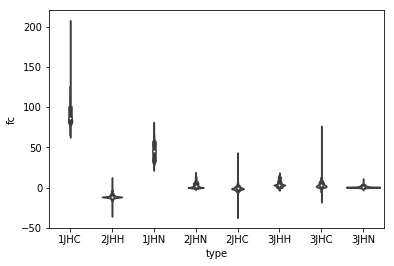

In [23]:
sns.violinplot(x='type', y='fc', data=scalar)

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


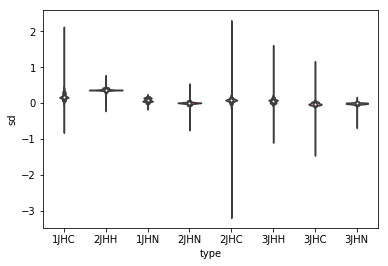

In [24]:
sns.violinplot(x='type', y='sd', data=scalar)

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


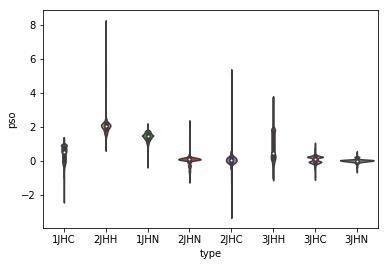

In [25]:
sns.violinplot(x='type', y='pso', data=scalar)

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


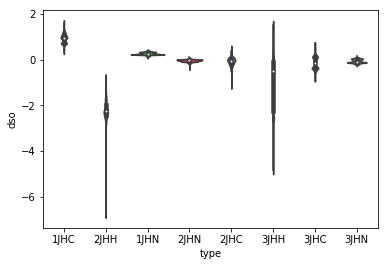

In [26]:
sns.violinplot(x='type', y='dso', data=scalar)

In [27]:
train_rdkit = feather.read_dataframe("../features/RdkitDescriptors_train.feather")
test_rdkit = feather.read_dataframe('../features/RdkitDescriptors_test.feather')

In [28]:
train_rdkit.shape, test_rdkit.shape

((4658147, 211), (2505542, 211))

In [29]:
train_rdkit.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,PMI1,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex
0,0.0,0.0,0.0,0.0,0.359785,16.043,12.011,16.0313,8.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.359785,16.043,12.011,16.0313,8.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.359785,16.043,12.011,16.0313,8.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.359785,16.043,12.011,16.0313,8.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.359785,16.043,12.011,16.0313,8.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0


In [30]:
ids = []
mols = []
for i in range(1, 133886):
    ids.append(f'dsgdb9nsd_{i:06}')
    try:
        with open(f'../data/input/structures/dsgdb9nsd_{i:06}.mol', 'r') as mol:
            mols.append(MolFromMolBlock(mol.read()))
    except:
        mols.append(np.nan)

In [31]:
rdkit_desc_df = pd.DataFrame()
rdkit_desc_df['ids'] = ids
rdkit_desc_df['mols'] = mols

In [32]:
rdkit_desc_df.head()

,ids,mols
0,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>
1,dsgdb9nsd_000002,<rdkit.Chem.rdchem.Mol object at 0x1a1ed45580>
2,dsgdb9nsd_000003,<rdkit.Chem.rdchem.Mol object at 0x1a1ed42e40>
3,dsgdb9nsd_000004,<rdkit.Chem.rdchem.Mol object at 0x1a1ed4a6c0>
4,dsgdb9nsd_000005,<rdkit.Chem.rdchem.Mol object at 0x1a1ed4ab20>


In [33]:
desc_2Ds = [v for k, v in Descriptors.__dict__.items() if not '__' in k and not bool(re.match('_', k)) and callable(v)]
desc_3Ds = [v for k, v in Descriptors3D.__dict__.items() if not '__' in k and not bool(re.match('_', k)) and callable(v)]
desc_2Ds_cols = [k for k, v in Descriptors.__dict__.items() if not '__' in k and not bool(re.match('_', k)) and callable(v)]
desc_3Ds_cols = [k for k, v in Descriptors3D.__dict__.items() if not '__' in k and not bool(re.match('_', k)) and callable(v)]
desc_cols = desc_2Ds_cols + desc_3Ds_cols

#function for skipping molecules with no mol file
def skip_nan(func, mol):
    try:
        return func(mol)
    except:
        return np.nan

for desc_2D, desc_2Ds_col in zip(desc_2Ds, desc_2Ds_cols):
    rdkit_desc_df[desc_2Ds_col] = rdkit_desc_df['mols'].apply(lambda mol: skip_nan(desc_2D, mol))
for desc_3D, desc_3Ds_col in zip(desc_3Ds, desc_3Ds_cols):
    rdkit_desc_df[desc_3Ds_col] = rdkit_desc_df['mols'].apply(lambda mol: skip_nan(desc_3D, mol))

In [34]:
rdkit_desc_df.head()

,ids,mols,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,PMI1,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex
0,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>,0.0,0.0,0.0,0.0,0.359785,16.043,12.011,16.031300,...,0.000000e+00,3.614429e-35,3.614429e-35,0.000000e+00,0.0,1.734723e-18,0.0,0.0,0.0,0.000000e+00
1,dsgdb9nsd_000002,<rdkit.Chem.rdchem.Mol object at 0x1a1ed45580>,0.0,0.0,0.0,0.0,0.397555,17.031,14.007,17.026549,...,0.000000e+00,6.744125e-34,6.744125e-34,0.000000e+00,0.0,6.938894e-18,0.0,0.0,0.0,0.000000e+00
2,dsgdb9nsd_000003,<rdkit.Chem.rdchem.Mol object at 0x1a1ed42e40>,0.0,0.0,0.0,0.0,0.327748,18.015,15.999,18.010565,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
3,dsgdb9nsd_000004,<rdkit.Chem.rdchem.Mol object at 0x1a1ed4a6c0>,4.0,4.0,4.0,4.0,0.332926,26.038,24.022,26.015650,...,0.000000e+00,8.633513e+00,8.633513e+00,0.000000e+00,1.0,5.995000e-01,0.0,1.0,1.0,0.000000e+00
4,dsgdb9nsd_000005,<rdkit.Chem.rdchem.Mol object at 0x1a1ed4ab20>,6.5,3.5,6.5,3.5,0.369797,27.026,26.018,27.010899,...,-6.974940e-19,8.578714e+00,8.578714e+00,-8.130519e-20,1.0,5.742145e-01,0.0,1.0,1.0,-9.211172e-20


In [35]:
rdkit_desc_df.isnull().sum()

ids                            0
mols                        4688
MaxEStateIndex              4688
MinEStateIndex              4688
MaxAbsEStateIndex           4688
MinAbsEStateIndex           4688
qed                         4688
MolWt                       4688
HeavyAtomMolWt              4688
ExactMolWt                  4688
NumValenceElectrons         4688
NumRadicalElectrons         4688
MaxPartialCharge            4688
MinPartialCharge            4688
MaxAbsPartialCharge         4688
MinAbsPartialCharge         4688
FpDensityMorgan1            4688
FpDensityMorgan2            4688
FpDensityMorgan3            4688
BalabanJ                    4688
BertzCT                     4688
Chi0                        4688
Chi0n                       4688
Chi0v                       4688
Chi1                        4688
Chi1n                       4688
Chi1v                       4688
Chi2n                       4688
Chi2v                       4688
Chi3n                       4688
          

In [36]:
train_ = train.merge(rdkit_desc_df, left_on='molecule_name', right_on='ids', how='left')

In [37]:
train_.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,ids,mols,MaxEStateIndex,MinEStateIndex,...,PMI1,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>,0.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>,0.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>,0.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>,0.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>,0.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0


In [53]:
train_.drop('PropertyFunctor', axis=1, inplace=True)

In [41]:
train_.isnull().sum()

id                                0
molecule_name                     0
atom_index_0                      0
atom_index_1                      0
type                              0
scalar_coupling_constant          0
ids                               0
mols                          23339
MaxEStateIndex                23339
MinEStateIndex                23339
MaxAbsEStateIndex             23339
MinAbsEStateIndex             23339
qed                           23339
MolWt                         23339
HeavyAtomMolWt                23339
ExactMolWt                    23339
NumValenceElectrons           23339
NumRadicalElectrons           23339
MaxPartialCharge              23339
MinPartialCharge              23339
MaxAbsPartialCharge           23339
MinAbsPartialCharge           23339
FpDensityMorgan1              23339
FpDensityMorgan2              23339
FpDensityMorgan3              23339
BalabanJ                      23339
BertzCT                       23339
Chi0                        

In [54]:
tmp = train_[~train_.isnull().any(axis=1)]
tmp.shape

(4634808, 218)

In [55]:
train.shape

(4658147, 6)

In [56]:
train_.shape

(4658147, 218)

In [57]:
#23339ペアは消えた

In [58]:
tmp.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,ids,mols,MaxEStateIndex,MinEStateIndex,...,PMI1,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>,0.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>,0.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>,0.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>,0.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,dsgdb9nsd_000001,<rdkit.Chem.rdchem.Mol object at 0x1a1d2d4cb0>,0.0,0.0,...,0.0,3.614429e-35,3.614429e-35,0.0,0.0,1.734723e-18,0.0,0.0,0.0,0.0


In [68]:
num_cols = tmp.columns.values[(tmp.dtypes == 'int64') | (tmp.dtypes == 'float64')]
len(num_cols)

214

In [71]:
tmp[num_cols]

,id,atom_index_0,atom_index_1,scalar_coupling_constant,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,PMI1,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex
0,0,1,0,84.807600,0.000000,0.000000,0.000000,0.000000,0.359785,16.043,...,0.000000e+00,3.614429e-35,3.614429e-35,0.000000e+00,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.000000e+00
1,1,1,2,-11.257000,0.000000,0.000000,0.000000,0.000000,0.359785,16.043,...,0.000000e+00,3.614429e-35,3.614429e-35,0.000000e+00,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.000000e+00
2,2,1,3,-11.254800,0.000000,0.000000,0.000000,0.000000,0.359785,16.043,...,0.000000e+00,3.614429e-35,3.614429e-35,0.000000e+00,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.000000e+00
3,3,1,4,-11.254300,0.000000,0.000000,0.000000,0.000000,0.359785,16.043,...,0.000000e+00,3.614429e-35,3.614429e-35,0.000000e+00,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.000000e+00
4,4,2,0,84.807400,0.000000,0.000000,0.000000,0.000000,0.359785,16.043,...,0.000000e+00,3.614429e-35,3.614429e-35,0.000000e+00,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.000000e+00
5,5,2,3,-11.254100,0.000000,0.000000,0.000000,0.000000,0.359785,16.043,...,0.000000e+00,3.614429e-35,3.614429e-35,0.000000e+00,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.000000e+00
6,6,2,4,-11.254800,0.000000,0.000000,0.000000,0.000000,0.359785,16.043,...,0.000000e+00,3.614429e-35,3.614429e-35,0.000000e+00,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.000000e+00
7,7,3,0,84.809300,0.000000,0.000000,0.000000,0.000000,0.359785,16.043,...,0.000000e+00,3.614429e-35,3.614429e-35,0.000000e+00,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.000000e+00
8,8,3,4,-11.254300,0.000000,0.000000,0.000000,0.000000,0.359785,16.043,...,0.000000e+00,3.614429e-35,3.614429e-35,0.000000e+00,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.000000e+00
9,9,4,0,84.809500,0.000000,0.000000,0.000000,0.000000,0.359785,16.043,...,0.000000e+00,3.614429e-35,3.614429e-35,0.000000e+00,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.000000e+00


In [ ]:
final = tmp[num_cols][tmp[num_cols].std(axis=1) > 0]
final.shape